In [1]:
import numpy as np
import pandas as pd
import os
import time
from tqdm import tqdm, trange
import sys
import matplotlib.pyplot as plt

In [2]:
# variaveis
L = 100 # lado do lattice
n_lagartos = L**2 # lagartos que cabem no lattice
estrategias = ['O', 'Y', 'B'] # estratégias possíveis
a = 2 # ganho em fitness ao vencer
b = 1/a # ganho em fitness ao perder
matriz_payoff = np.array([[1, b, a],
                          [a, 1, b],
                          [b, a, 1]])
index_map = {'O': 0, 'Y': 1, 'B': 2}
n_geracoes = 100
n_pop = 100 # número de populações independentes
tipo = "homogenea" # tipo de vizinhança: "homogenea", "I", "II" ou "adaptativa"
prob_mutacao = None # probabilidade de mutação a cada geração
threshold_O = 0.7 # threshold para a proporção de O na vizinhança adaptativa

       t  y estrategia  n_vizinhos_media
0      0  1          O               NaN
1      0  1          Y               NaN
2      0  1          B               NaN
3      1  1          O          8.000000
4      1  1          Y          4.999652
..   ... ..        ...               ...
298   99  1          Y          2.708684
299   99  1          B          0.000000
300  100  1          O          8.000000
301  100  1          Y          2.705781
302  100  1          B          0.000000

[303 rows x 4 columns]


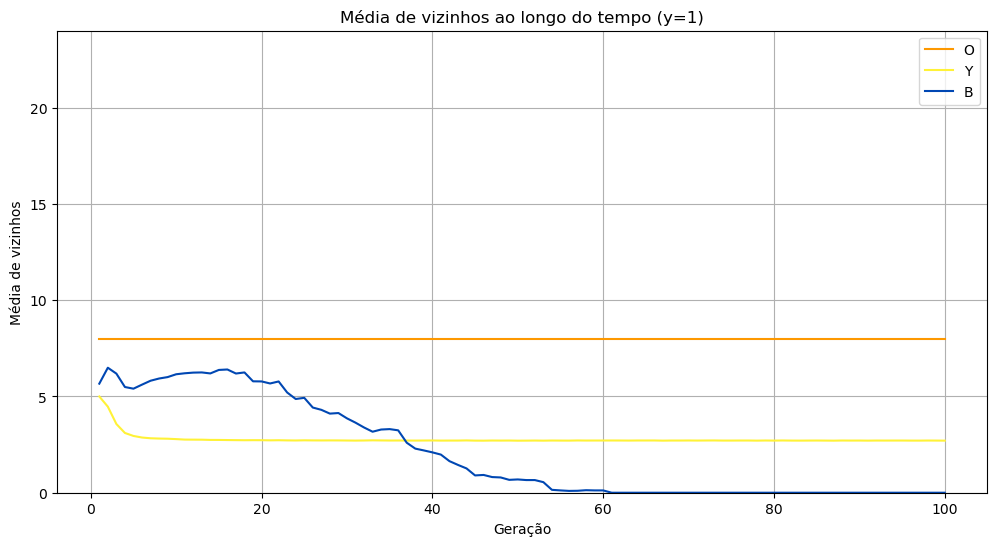

       t  y estrategia  n_vizinhos_media
0      0  2          O               NaN
1      0  2          Y               NaN
2      0  2          B               NaN
3      1  2          O          8.000000
4      1  2          Y          5.668574
..   ... ..        ...               ...
298   99  2          Y          4.282881
299   99  2          B          5.363265
300  100  2          O          8.000000
301  100  2          Y          4.284446
302  100  2          B          5.364330

[303 rows x 4 columns]


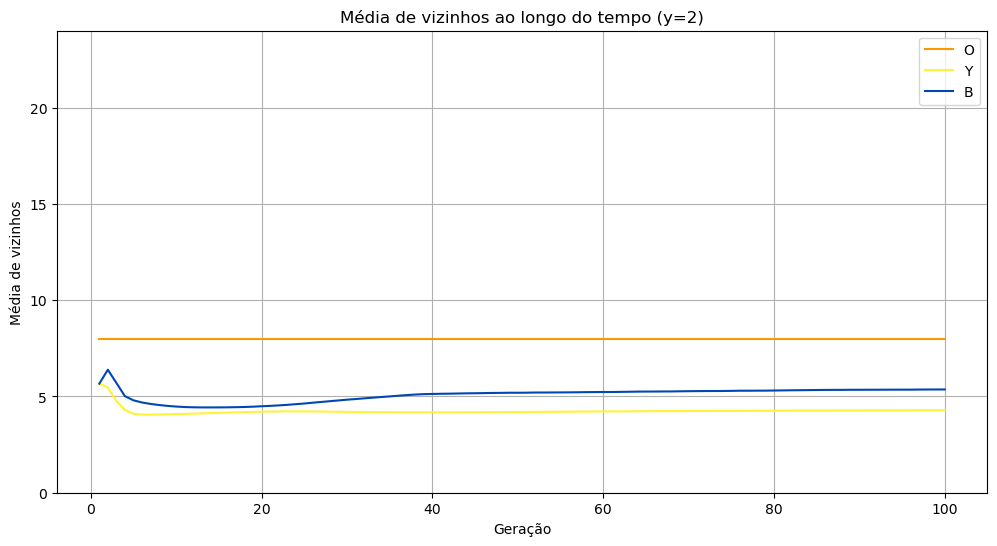

       t  y estrategia  n_vizinhos_media
0      0  3          O               NaN
1      0  3          Y               NaN
2      0  3          B               NaN
3      1  3          O          8.000000
4      1  3          Y          6.668735
..   ... ..        ...               ...
298   99  3          Y          6.093550
299   99  3          B          6.394251
300  100  3          O          8.000000
301  100  3          Y          6.093384
302  100  3          B          6.395895

[303 rows x 4 columns]


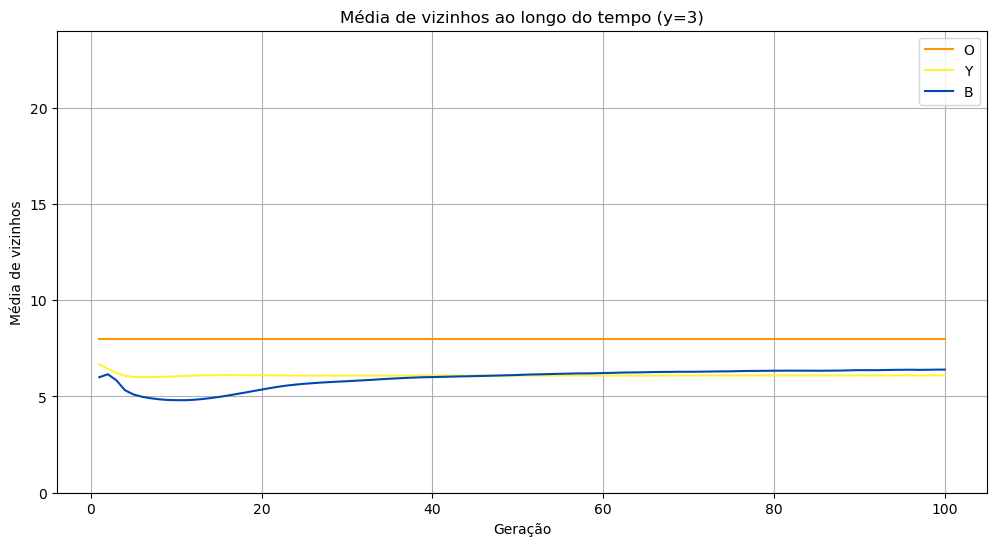

       t  y estrategia  n_vizinhos_media
0      0  4          O               NaN
1      0  4          Y               NaN
2      0  4          B               NaN
3      1  4          O          8.000000
4      1  4          Y          7.334129
..   ... ..        ...               ...
298   99  4          Y          7.963279
299   99  4          B          5.374569
300  100  4          O          8.000000
301  100  4          Y          7.964141
302  100  4          B          5.378266

[303 rows x 4 columns]


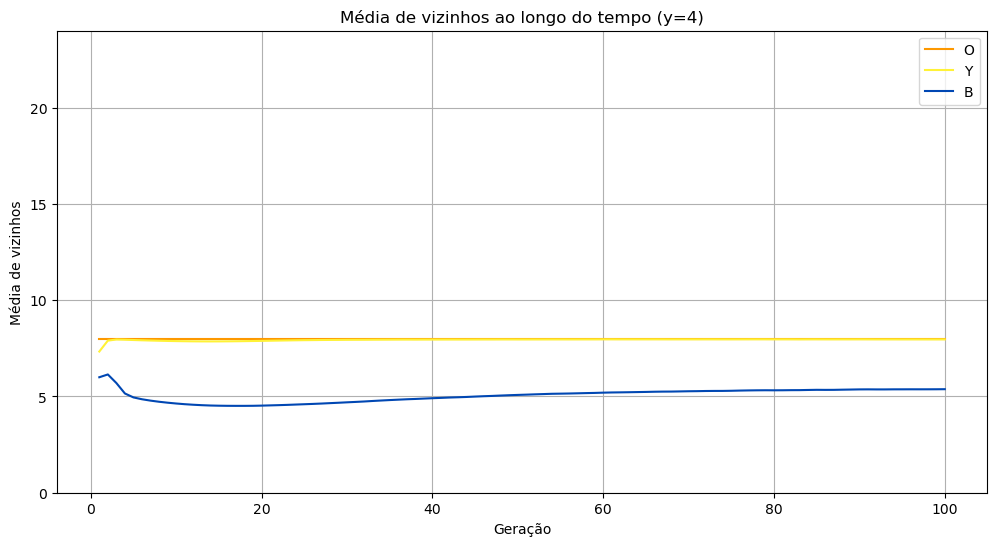

       t  y estrategia  n_vizinhos_media
0      0  5          O               NaN
1      0  5          Y               NaN
2      0  5          B               NaN
3      1  5          O          8.000000
4      1  5          Y          7.334129
..   ... ..        ...               ...
298   99  5          Y          7.964818
299   99  5          B          5.385633
300  100  5          O          8.000000
301  100  5          Y          7.963896
302  100  5          B          5.388174

[303 rows x 4 columns]


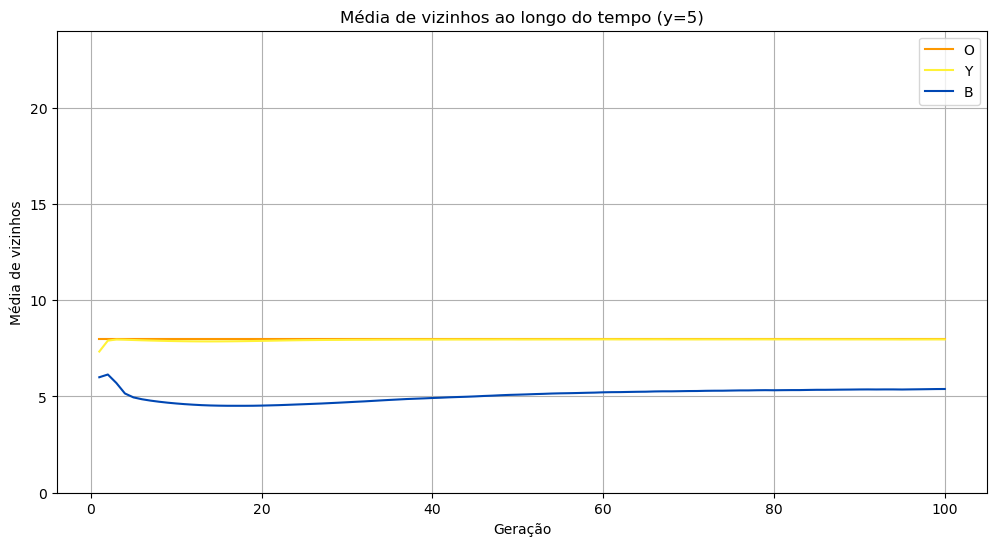

       t  y estrategia  n_vizinhos_media
0      0  6          O               NaN
1      0  6          Y               NaN
2      0  6          B               NaN
3      1  6          O          8.000000
4      1  6          Y          7.666386
..   ... ..        ...               ...
298   99  6          Y          7.989726
299   99  6          B          5.632980
300  100  6          O          8.000000
301  100  6          Y          7.989586
302  100  6          B          5.635022

[303 rows x 4 columns]


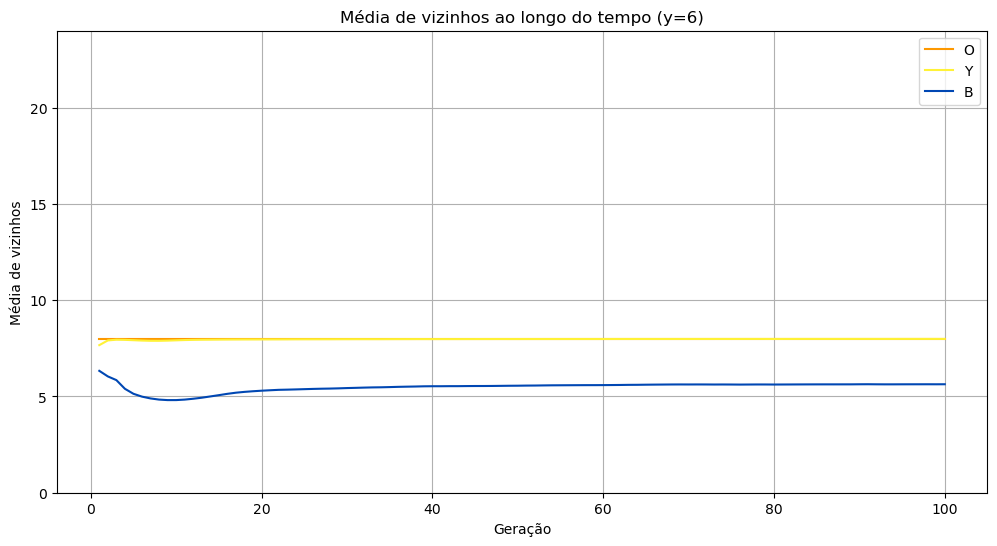

       t  y estrategia  n_vizinhos_media
0      0  7          O               NaN
1      0  7          Y               NaN
2      0  7          B               NaN
3      1  7          O          8.000000
4      1  7          Y          7.666386
..   ... ..        ...               ...
298   99  7          Y          7.989962
299   99  7          B          5.635483
300  100  7          O          8.000000
301  100  7          Y          7.990284
302  100  7          B          5.635634

[303 rows x 4 columns]


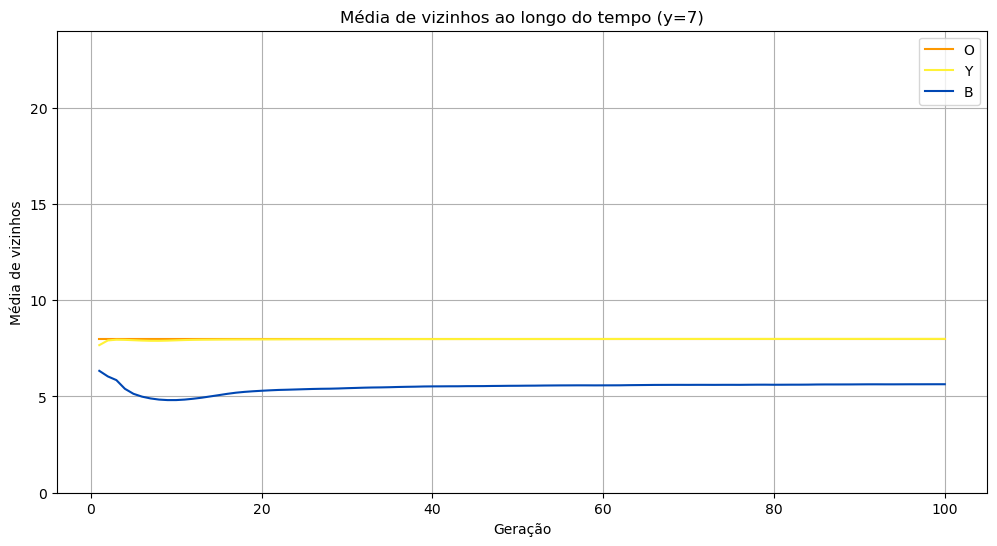

       t  y estrategia  n_vizinhos_media
0      0  8          O               NaN
1      0  8          Y               NaN
2      0  8          B               NaN
3      1  8          O          8.000000
4      1  8          Y          8.000000
..   ... ..        ...               ...
298   99  8          Y          8.000000
299   99  8          B          5.793123
300  100  8          O          8.000000
301  100  8          Y          8.000000
302  100  8          B          5.799707

[303 rows x 4 columns]


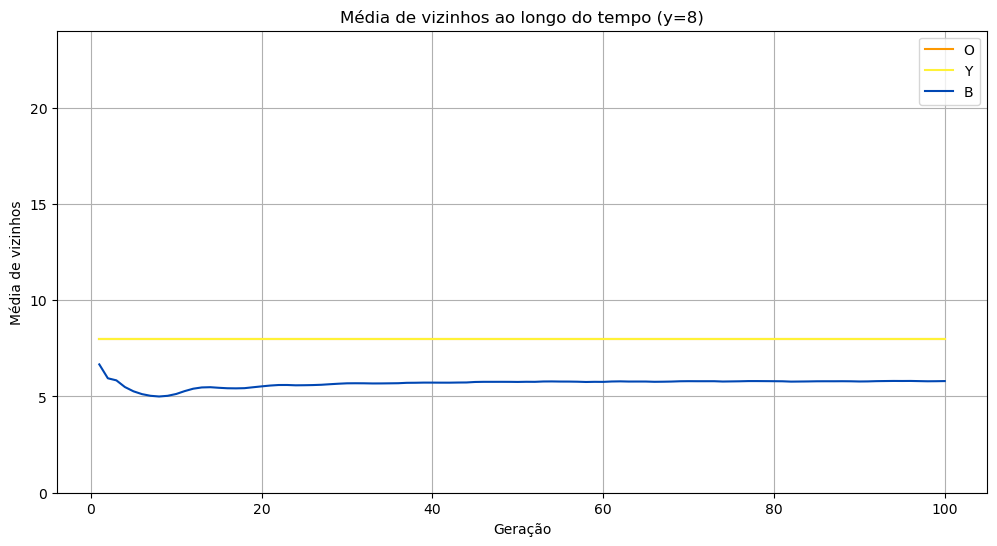

       t  y estrategia  n_vizinhos_media
0      0  9          O               NaN
1      0  9          Y               NaN
2      0  9          B               NaN
3      1  9          O          8.332657
4      1  9          Y          9.336485
..   ... ..        ...               ...
298   99  9          Y          9.530024
299   99  9          B          4.859452
300  100  9          O          8.219389
301  100  9          Y          9.531958
302  100  9          B          4.854969

[303 rows x 4 columns]


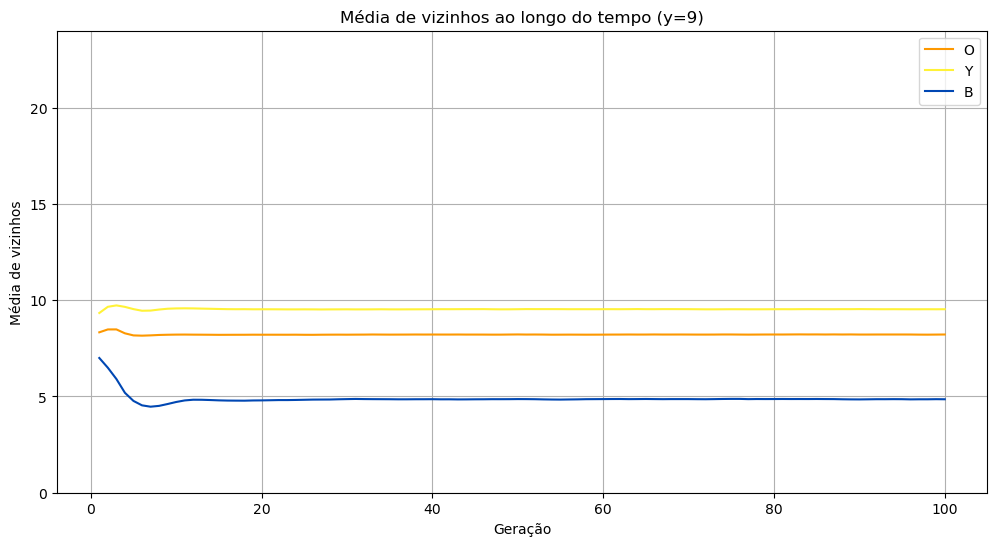

       t   y estrategia  n_vizinhos_media
0      0  10          O               NaN
1      0  10          Y               NaN
2      0  10          B               NaN
3      1  10          O          8.666744
4      1  10          Y         10.669499
..   ...  ..        ...               ...
298   99  10          Y         11.006863
299   99  10          B          4.410131
300  100  10          O          8.373511
301  100  10          Y         11.012684
302  100  10          B          4.409070

[303 rows x 4 columns]


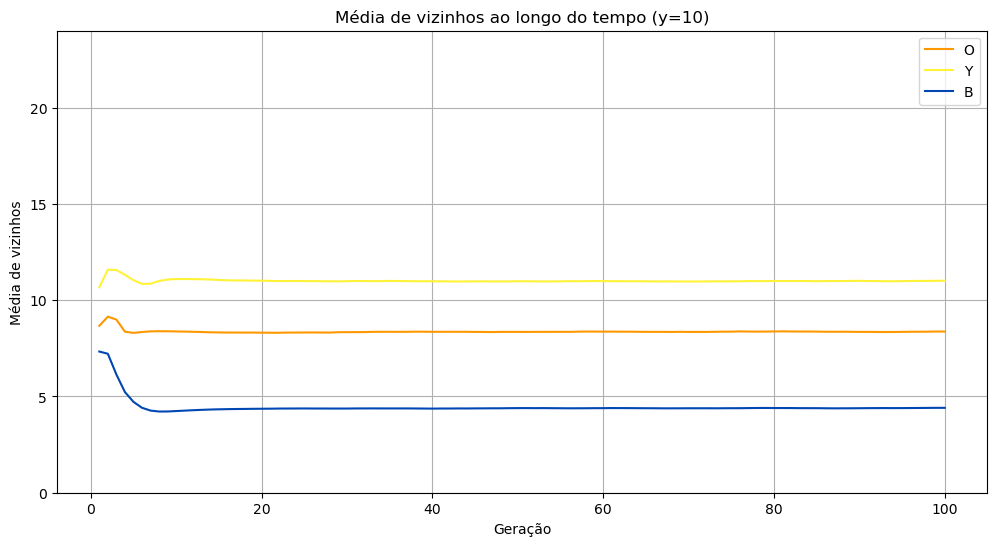

       t   y estrategia  n_vizinhos_media
0      0  11          O               NaN
1      0  11          Y               NaN
2      0  11          B               NaN
3      1  11          O          9.000327
4      1  11          Y         12.003801
..   ...  ..        ...               ...
298   99  11          Y          9.361458
299   99  11          B          4.053875
300  100  11          O          6.573949
301  100  11          Y          9.372630
302  100  11          B          4.052559

[303 rows x 4 columns]


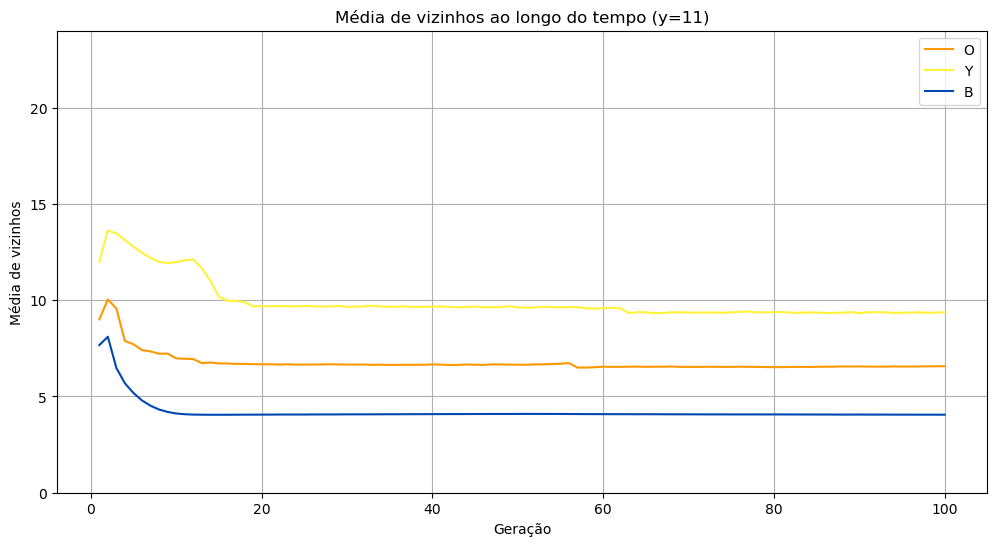

       t   y estrategia  n_vizinhos_media
0      0  12          O               NaN
1      0  12          Y               NaN
2      0  12          B               NaN
3      1  12          O          9.332996
4      1  12          Y         13.339274
..   ...  ..        ...               ...
298   99  12          Y         12.101614
299   99  12          B          4.343108
300  100  12          O          0.000000
301  100  12          Y         12.102908
302  100  12          B          4.344068

[303 rows x 4 columns]


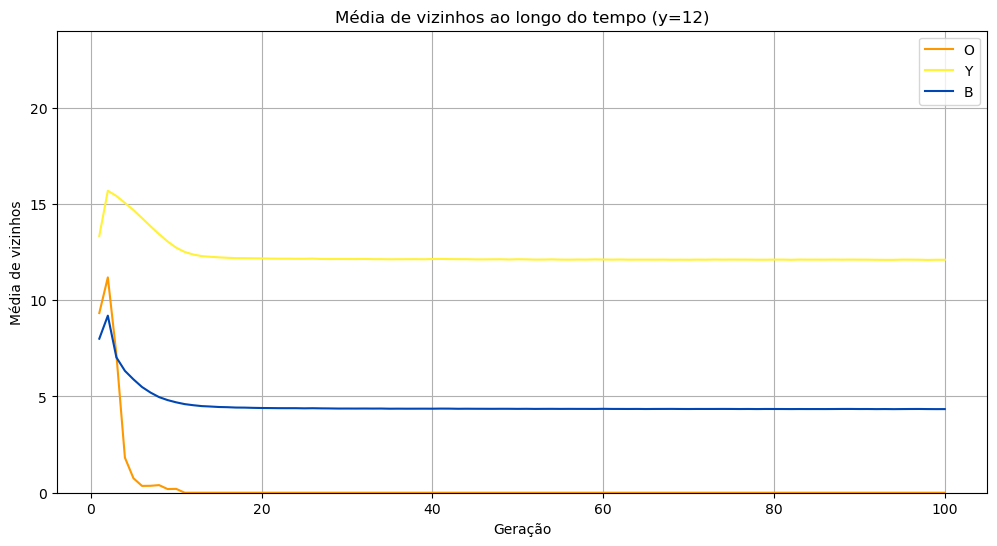

       t   y estrategia  n_vizinhos_media
0      0  13          O               NaN
1      0  13          Y               NaN
2      0  13          B               NaN
3      1  13          O          9.668031
4      1  13          Y         14.670953
..   ...  ..        ...               ...
298   99  13          Y         13.906848
299   99  13          B          5.408432
300  100  13          O          0.000000
301  100  13          Y         13.906759
302  100  13          B          5.411355

[303 rows x 4 columns]


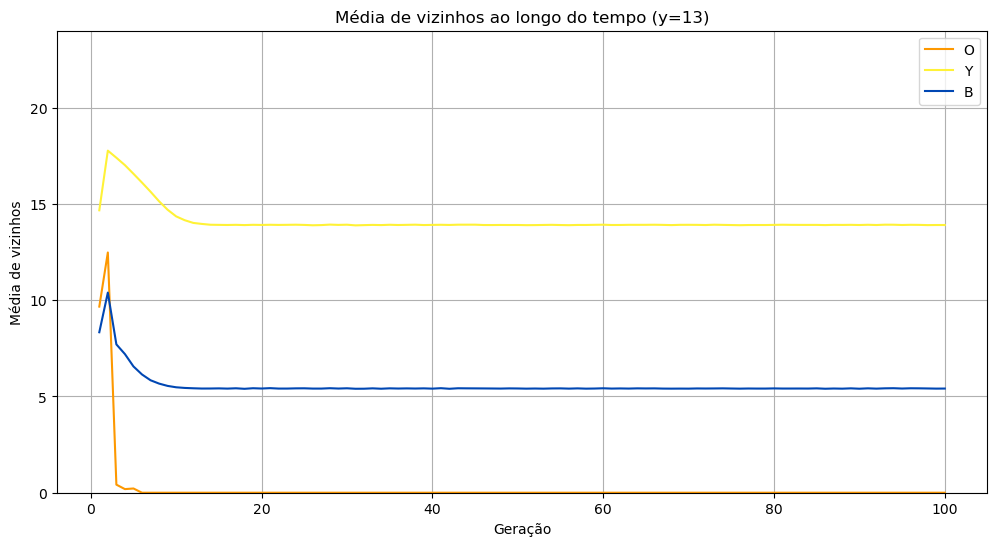

       t   y estrategia  n_vizinhos_media
0      0  14          O               NaN
1      0  14          Y               NaN
2      0  14          B               NaN
3      1  14          O         10.000779
4      1  14          Y         16.006079
..   ...  ..        ...               ...
298   99  14          Y         15.356268
299   99  14          B          5.944418
300  100  14          O          0.000000
301  100  14          Y         15.361826
302  100  14          B          5.926440

[303 rows x 4 columns]


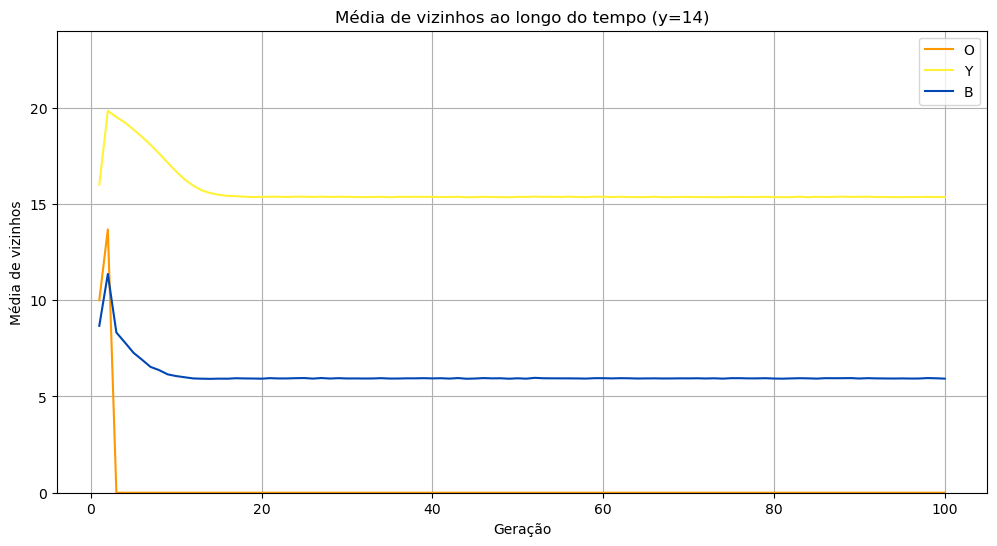

       t   y estrategia  n_vizinhos_media
0      0  15          O               NaN
1      0  15          Y               NaN
2      0  15          B               NaN
3      1  15          O         10.333776
4      1  15          Y         17.341086
..   ...  ..        ...               ...
298   99  15          Y         16.941481
299   99  15          B          6.458976
300  100  15          O          0.000000
301  100  15          Y         16.947489
302  100  15          B          6.468547

[303 rows x 4 columns]


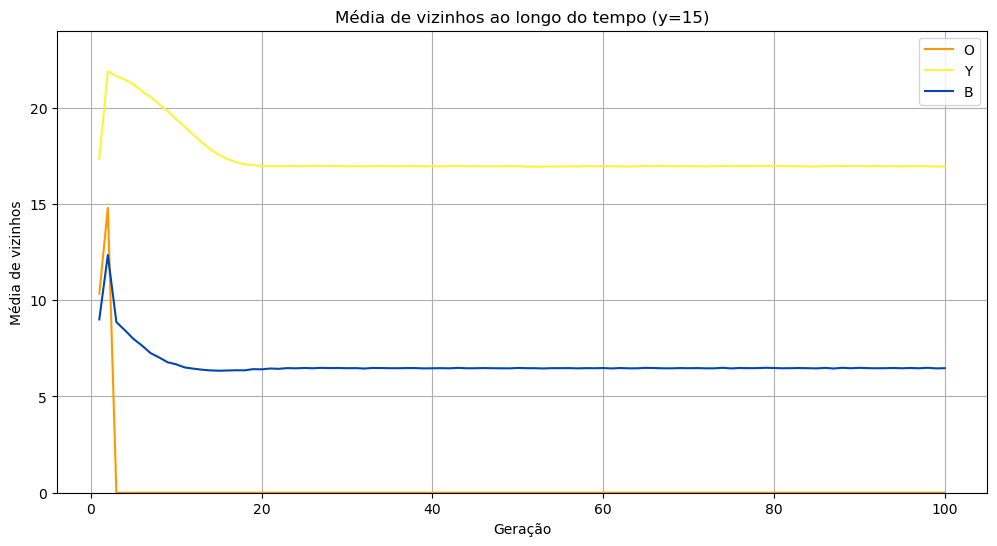

       t   y estrategia  n_vizinhos_media
0      0  16          O               NaN
1      0  16          Y               NaN
2      0  16          B               NaN
3      1  16          O         10.668501
4      1  16          Y         18.674053
..   ...  ..        ...               ...
298   99  16          Y         18.974063
299   99  16          B          7.095071
300  100  16          O          0.000000
301  100  16          Y         18.962135
302  100  16          B          7.085533

[303 rows x 4 columns]


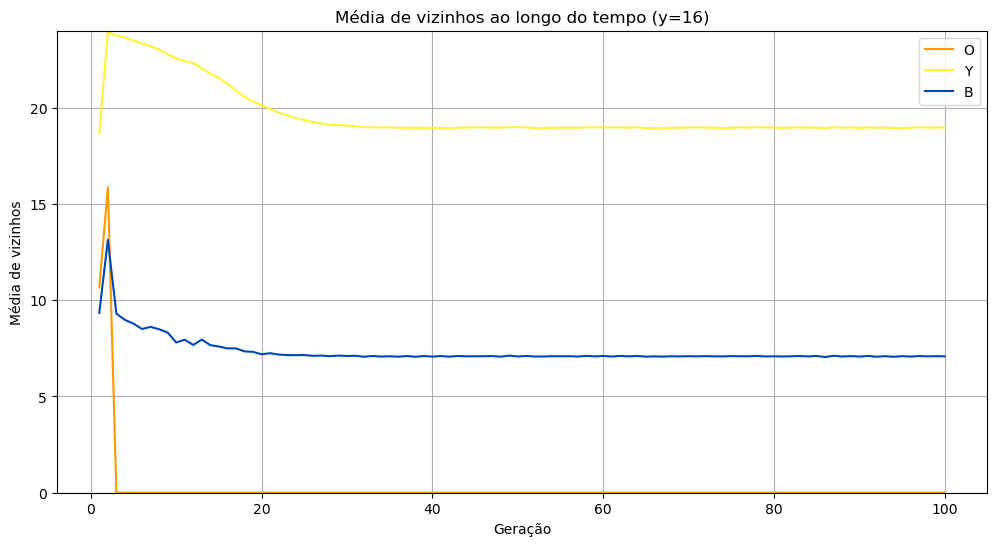

       t   y estrategia  n_vizinhos_media
0      0  17          O               NaN
1      0  17          Y               NaN
2      0  17          B               NaN
3      1  17          O         11.001786
4      1  17          Y         19.341086
..   ...  ..        ...               ...
298   99  17          Y         19.552356
299   99  17          B          7.190975
300  100  17          O          0.000000
301  100  17          Y         19.534203
302  100  17          B          7.163065

[303 rows x 4 columns]


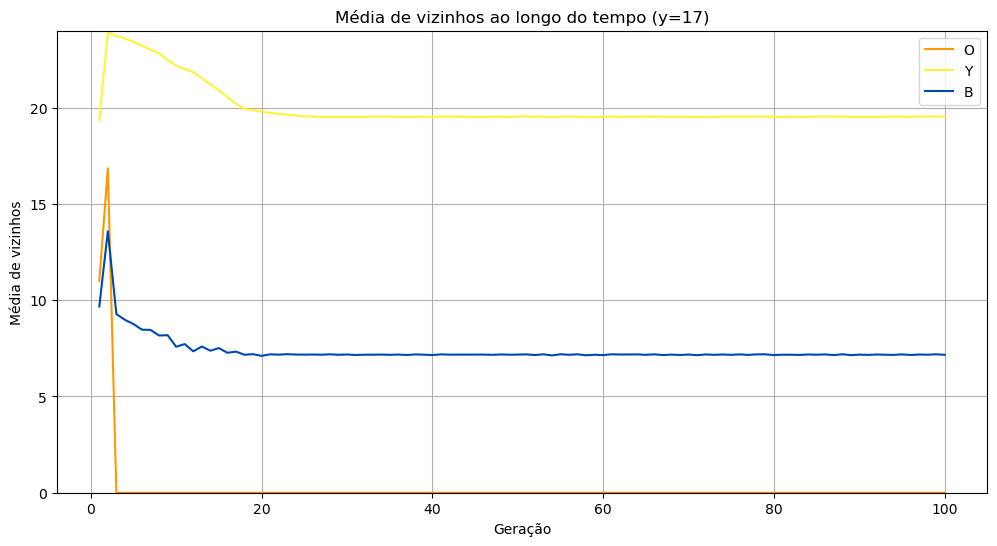

       t   y estrategia  n_vizinhos_media
0      0  18          O               NaN
1      0  18          Y               NaN
2      0  18          B               NaN
3      1  18          O         11.335374
4      1  18          Y         20.006079
..   ...  ..        ...               ...
298   99  18          Y         20.173629
299   99  18          B          7.271698
300  100  18          O          0.000000
301  100  18          Y         20.188642
302  100  18          B          7.343808

[303 rows x 4 columns]


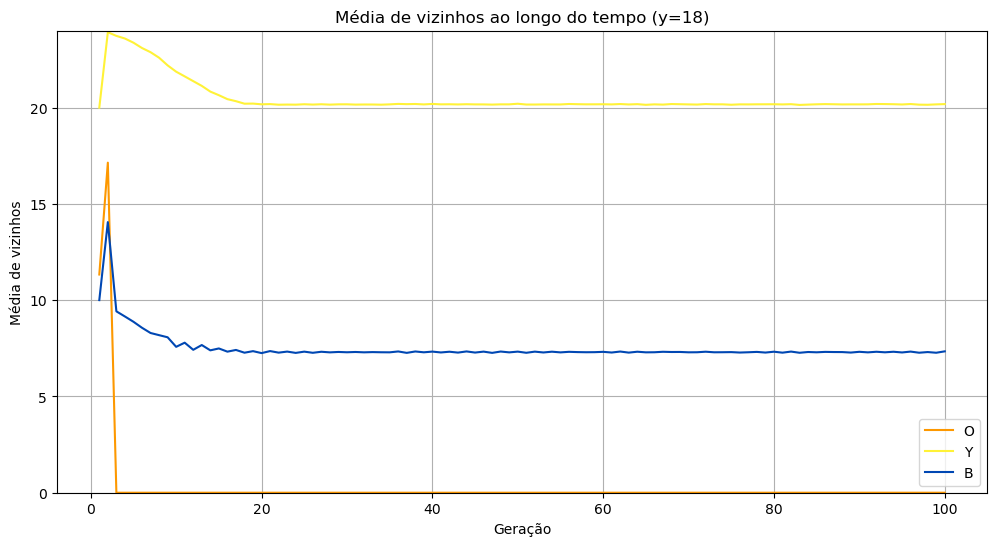

       t   y estrategia  n_vizinhos_media
0      0  19          O               NaN
1      0  19          Y               NaN
2      0  19          B               NaN
3      1  19          O         11.667576
4      1  19          Y         20.670953
..   ...  ..        ...               ...
298   99  19          Y         20.867414
299   99  19          B          7.419040
300  100  19          O          0.000000
301  100  19          Y         20.847763
302  100  19          B          7.421743

[303 rows x 4 columns]


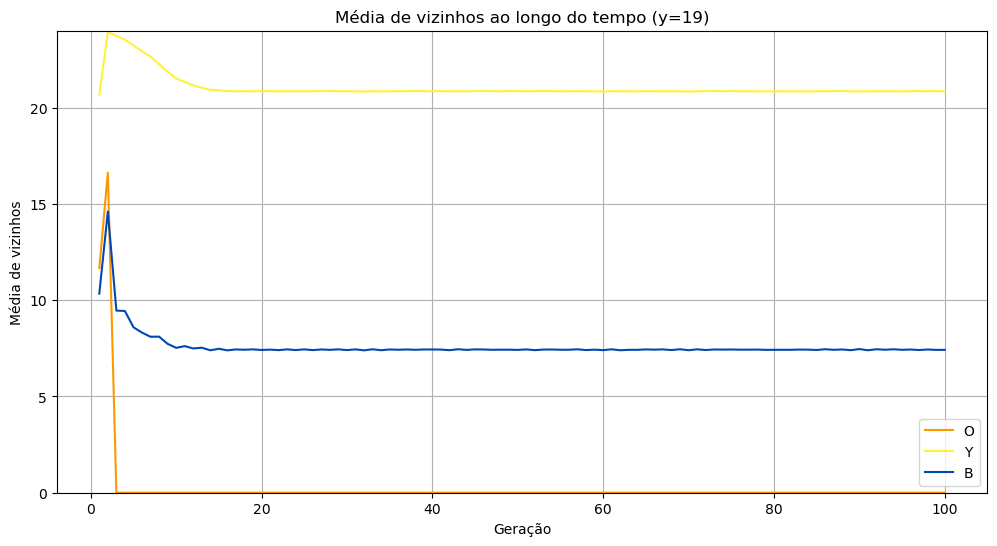

       t   y estrategia  n_vizinhos_media
0      0  20          O               NaN
1      0  20          Y               NaN
2      0  20          B               NaN
3      1  20          O         12.002588
4      1  20          Y         21.339274
..   ...  ..        ...               ...
298   99  20          Y         21.630098
299   99  20          B          7.649861
300  100  20          O          0.000000
301  100  20          Y         21.611289
302  100  20          B          7.565894

[303 rows x 4 columns]


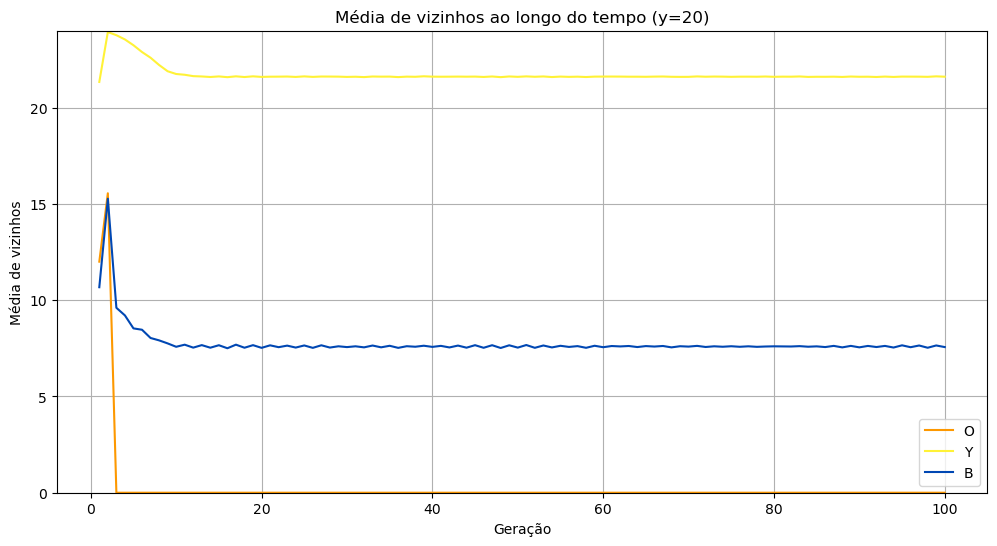

       t   y estrategia  n_vizinhos_media
0      0  21          O               NaN
1      0  21          Y               NaN
2      0  21          B               NaN
3      1  21          O         12.335594
4      1  21          Y         22.003801
..   ...  ..        ...               ...
298   99  21          Y         22.164590
299   99  21          B          7.638646
300  100  21          O          0.000000
301  100  21          Y         22.181765
302  100  21          B          7.662562

[303 rows x 4 columns]


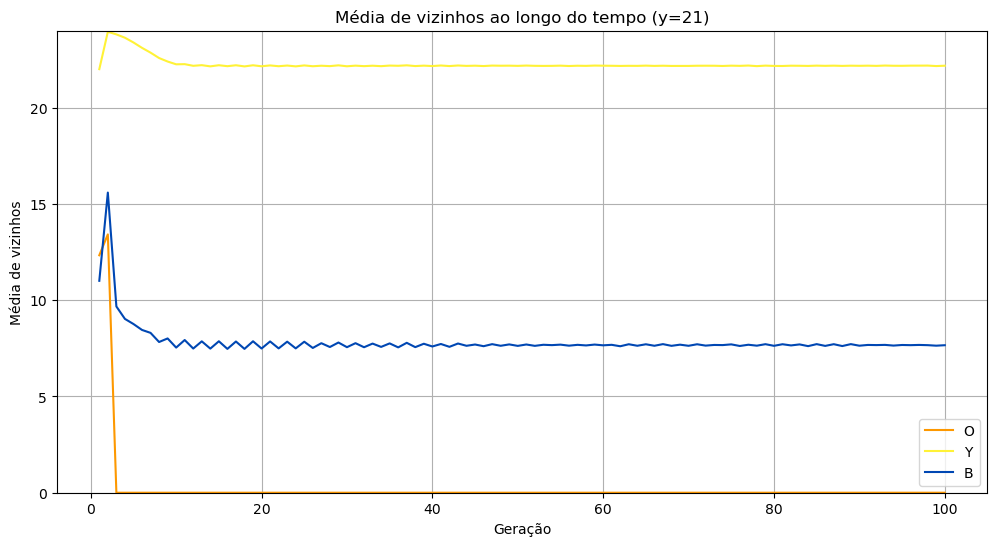

       t   y estrategia  n_vizinhos_media
0      0  22          O               NaN
1      0  22          Y               NaN
2      0  22          B               NaN
3      1  22          O         12.669997
4      1  22          Y         22.669499
..   ...  ..        ...               ...
298   99  22          Y         22.744631
299   99  22          B          7.767456
300  100  22          O          0.000000
301  100  22          Y         22.750527
302  100  22          B          7.751251

[303 rows x 4 columns]


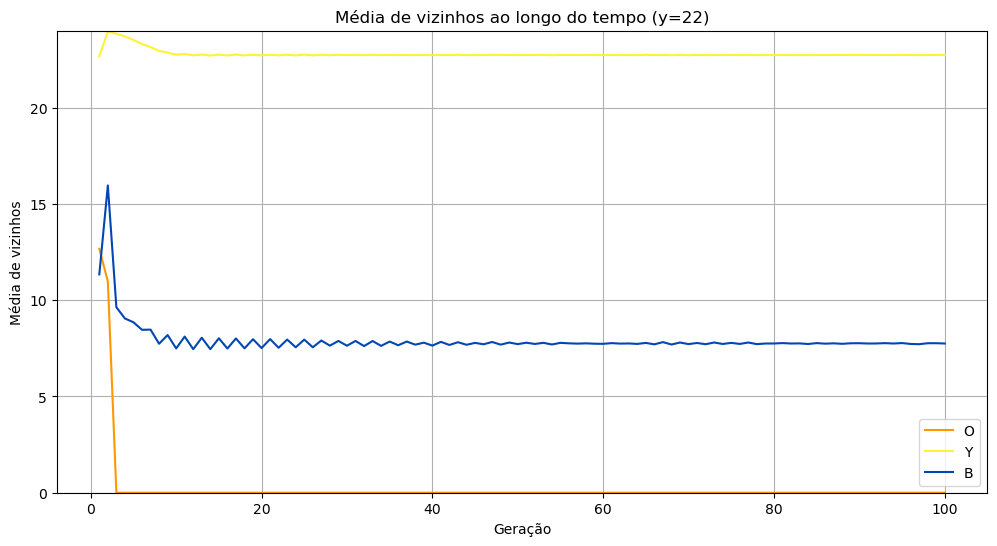

       t   y estrategia  n_vizinhos_media
0      0  23          O               NaN
1      0  23          Y               NaN
2      0  23          B               NaN
3      1  23          O         13.004141
4      1  23          Y         23.336485
..   ...  ..        ...               ...
298   99  23          Y         23.348850
299   99  23          B          7.846103
300  100  23          O          0.000000
301  100  23          Y         23.353608
302  100  23          B          7.898853

[303 rows x 4 columns]


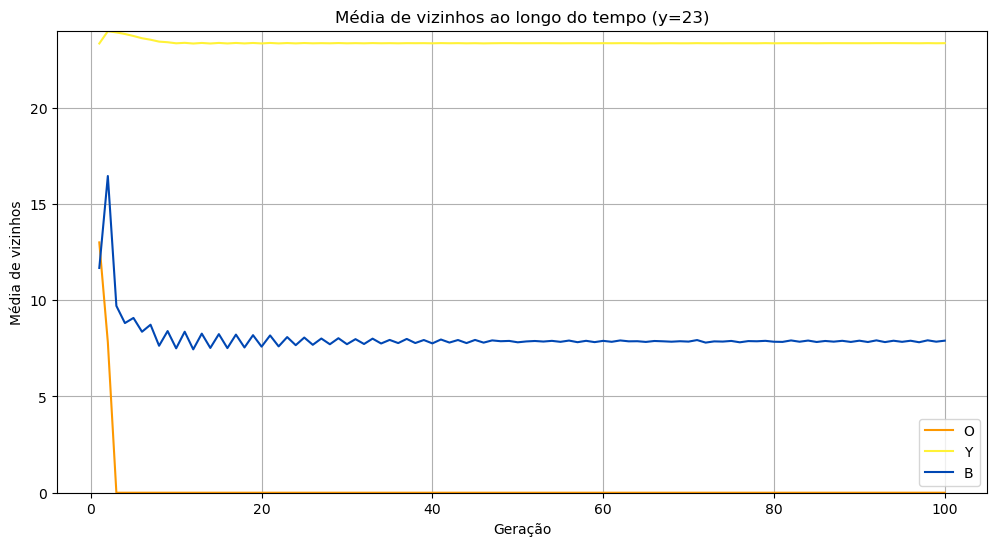

       t   y estrategia  n_vizinhos_media
0      0  24          O               NaN
1      0  24          Y               NaN
2      0  24          B               NaN
3      1  24          O         13.336558
4      1  24          Y         24.000000
..   ...  ..        ...               ...
298   99  24          Y         24.000000
299   99  24          B          8.010677
300  100  24          O          0.000000
301  100  24          Y         24.000000
302  100  24          B          8.026856

[303 rows x 4 columns]


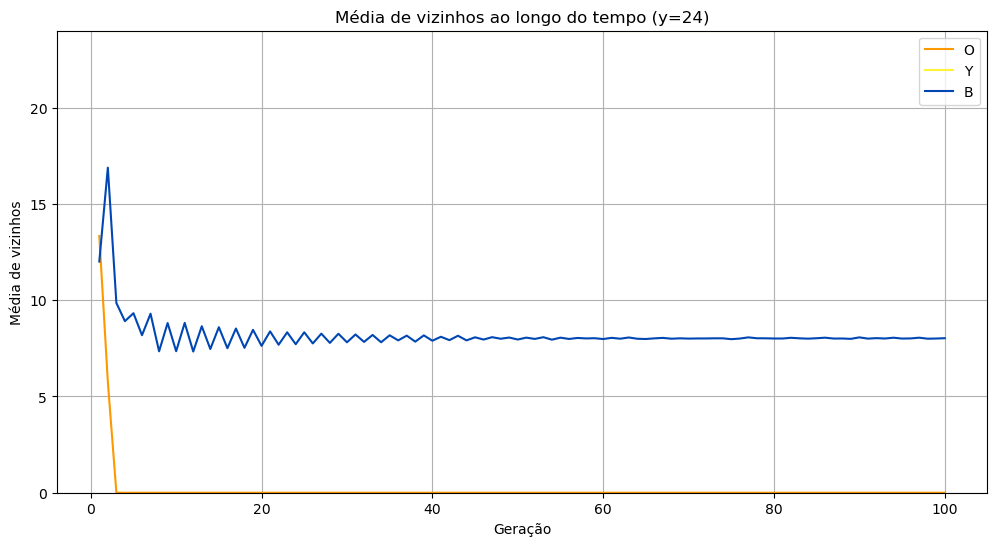

In [4]:
Y_max = 24

for y in range(1, Y_max+1):
    df_n_vizinhos = pd.read_csv(f"C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/sensibilidade/vizinhosY/n_vizinhos_y{y}.csv")
    print(df_n_vizinhos)

    cores = {"O": "#FD9800", "B": "#0047B3", "Y": "#FFF237"}
    estrategias = ['O', 'Y', 'B']

    Y_max = df_n_vizinhos['y'].max() + 1  # ajusta se necessário
    t_max = df_n_vizinhos['t'].max() + 1 # ajusta se necessário

    plt.figure(figsize=(12, 6))
    for strategy in estrategias:
        dados = df_n_vizinhos[(df_n_vizinhos['y'] == y) & (df_n_vizinhos['estrategia'] == strategy)]
        # Agrupa por geração e calcula a média dos vizinhos
        media_vizinhos = dados.groupby('t')['n_vizinhos_media'].mean()
        plt.plot(media_vizinhos.index, media_vizinhos.values, label=strategy, color=cores[strategy])
    plt.title(f"Média de vizinhos ao longo do tempo (y={y})")
    plt.xlabel("Geração")
    plt.ylabel("Média de vizinhos")
    plt.grid(True)
    plt.ylim(0, 24)
    plt.legend()
    plt.show()

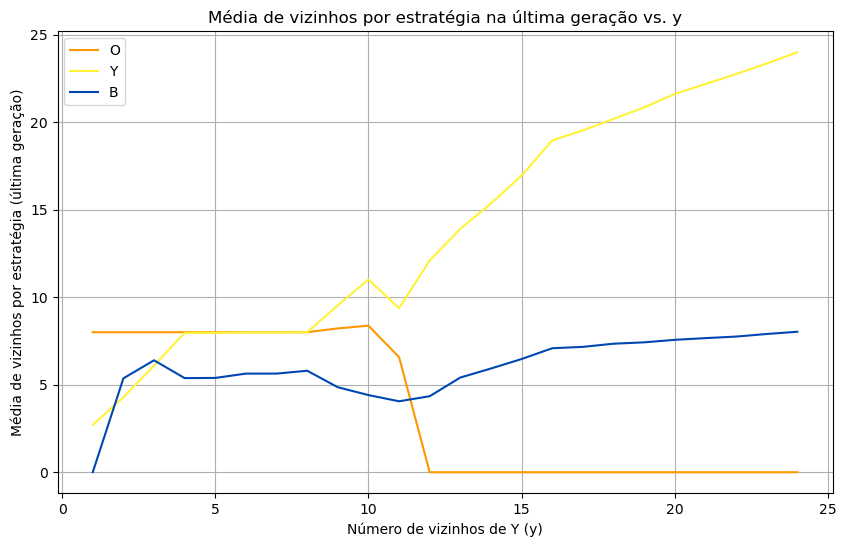

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Y_max = 24
estrategias = ['O', 'Y', 'B']
cores = {"O": "#FD9800", "B": "#0047B3", "Y": "#FFF237"}

# Dicionário para guardar os valores finais por estratégia
valores_finais = {estrat: [] for estrat in estrategias}

for y in range(1, Y_max+1):
    df = pd.read_csv(f"C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/sensibilidade/vizinhosY/n_vizinhos_y{y}.csv")
    t_final = df['t'].max()
    for estrat in estrategias:
        valor = df[(df['t'] == t_final) & (df['estrategia'] == estrat)]['n_vizinhos_media'].mean()
        valores_finais[estrat].append(valor)

plt.figure(figsize=(10, 6))
for estrat in estrategias:
    plt.plot(range(1, Y_max+1), valores_finais[estrat], label=estrat, color=cores[estrat])

plt.xlabel("Número de vizinhos de Y (y)")
plt.ylabel("Média de vizinhos por estratégia (última geração)")
plt.title("Média de vizinhos por estratégia na última geração vs. y")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join("C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/sensibilidade/vizinhosY/plot_freq_final_vs_vizinhosY.png"), dpi=300, bbox_inches='tight')
plt.show()

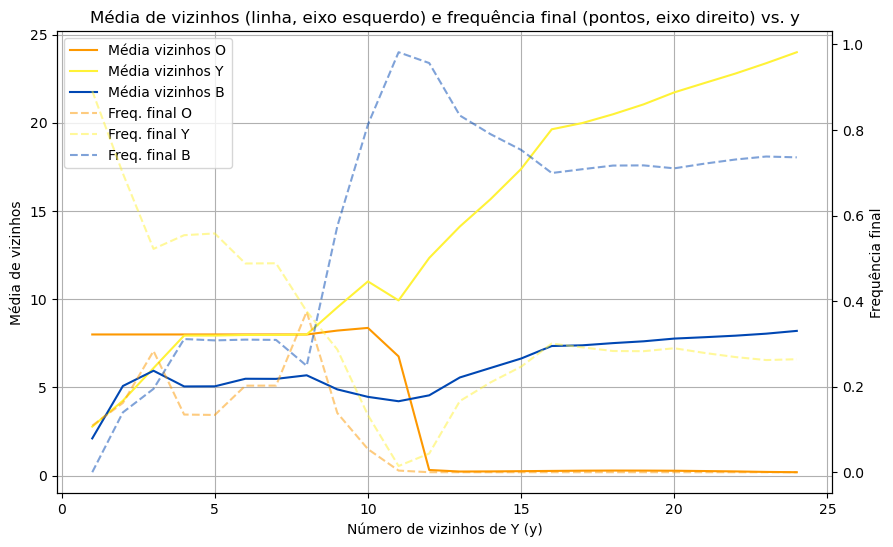

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Y_max = 24
estrategias = ['O', 'Y', 'B']
cores = {"O": "#FD9800", "B": "#0047B3", "Y": "#FFF237"}

valores_medias = {estrat: [] for estrat in estrategias}

for y in range(1, Y_max+1):
    df = pd.read_csv(f"C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/sensibilidade/vizinhosY/n_vizinhos_y{y}.csv")
    for estrat in estrategias:
        media = df[df['estrategia'] == estrat]['n_vizinhos_media'].mean()
        valores_medias[estrat].append(media)

plt.figure(figsize=(10, 6))
for estrat in estrategias:
    plt.plot(range(1, Y_max+1), valores_medias[estrat], label=estrat, color=cores[estrat])

plt.xlabel("Número de vizinhos de Y (y)")
plt.ylabel("Média de vizinhos por estratégia (média das gerações)")
plt.title("Média de vizinhos por estratégia (média das gerações) vs. y")
plt.legend()
plt.grid(True)
plt.savefig("C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/sensibilidade/vizinhosY/plot_n_vizinhos_vs_vizinhosY.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
for y in range(1, Y_max+1):
    df = pd.read_csv(f"C:/Unicamp/mestrado/simulacoes/RPS-python/RPS-POO/outputs/sensibilidade/vizinhosY/frequencias_sensibilidadeY_y{y}.csv")